## **Week 3 Task**
## **Task Name:** **House** **price** **prediction**
### **Name of student: Shreyash Sarage**

**1**) **Download** **and** **read** **Dataset** **from** **the** **link** **provided** **below**.
**Dataset**:
https://www.kaggle.com/altavish/boston-housing-dataset?select=HousingData.csv

In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/shreyash1401/week3-Task/main/HousingData.csv")
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


**2**) **Data** **preprocessing**
**Ex**: **Check** **for** **null** **values** **and** **replace** **or** **drop** **them**, **scale** **the** **data**,
**encode** **the** **categorical** **data(if** **any) etc**.

In [3]:
#checking null values
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
dataset.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(dataset.tail(10))

        CRIM   ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
496  0.28960  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  21.14  19.7
497  0.26838  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.10  18.3
498  0.23912  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  12.92  21.2
499  0.17783  0.0   9.69   0.0  0.585  ...  391     19.2  395.77  15.10  17.5
500  0.22438  0.0   9.69   0.0  0.585  ...  391     19.2  396.90  14.33  16.8
501  0.06263  0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959  0.0  11.93   0.0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741  0.0  11.93   0.0  0.573  ...  273     21.0  396.90   7.88  11.9

[10 rows x 14 columns]


In [7]:
#correlation between the features
corr = dataset.corr()
corr.shape

(14, 14)

**3**) **Visualise** **some** **of** **the** **attributes** **of** **the** **dataset**.
**Ex**:**Plot** **some** **graphs** **for** **better** **understanding** **of** **the** **dataset**.

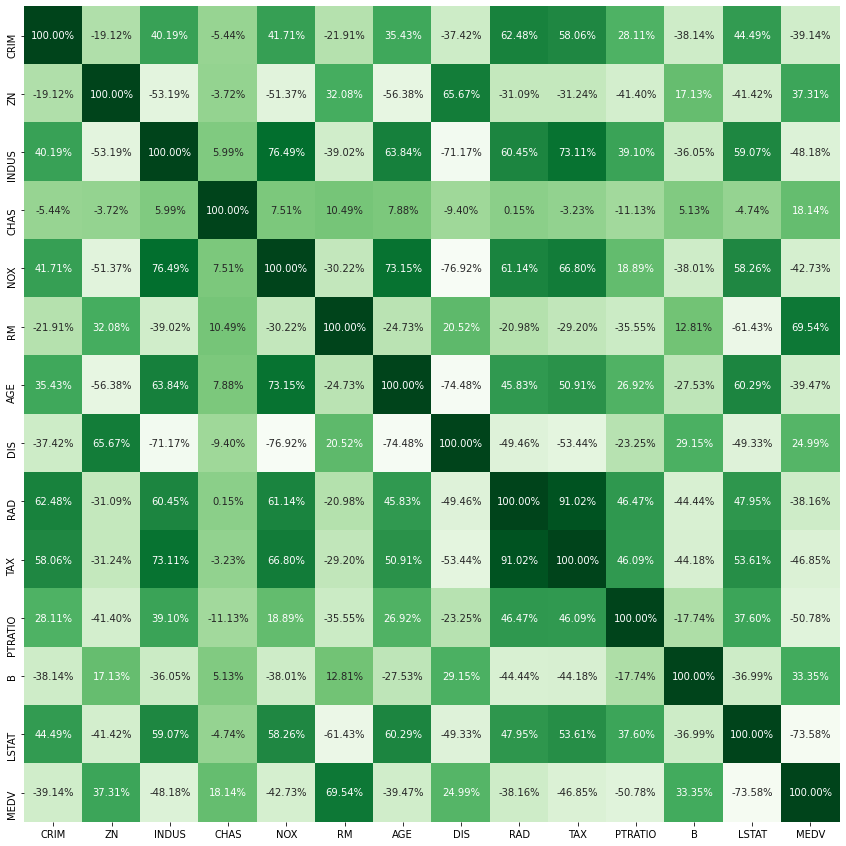

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

**4**) **Write** **the** **observations** **you** **have** **made** **during** **the** **analysis** **in** **a**
**Markdown** **Cell**.

Houses with more rooms(higher 'RM' value) will worth more.

The prices increase as the value of RM increases linearly. 

5) Split your whole dataset between training and testing dataset.

In [9]:
from sklearn.datasets import load_boston
boston=load_boston()

In [11]:
data = pd.DataFrame(boston.data)

In [12]:
data['price'] = boston.target

In [13]:
X = data.drop(['price'], axis = 1)
y = data['price']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (404, 13)
X_test:  (102, 13)
y_train:  (404,)
y_test:  (102,)


**6**) **Predict** **the** **price** **using** **the** **following** **algorithms**:
**a**) **Linear** **Regression**
**b**) **KNN**
(**Play** **with** **the** **parameters** **for** **more** **accuracy**) 

 a) Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

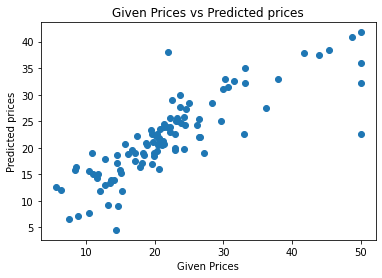

In [17]:
pred_linreg =LR.predict(X_test)
plt.scatter(y_test,pred_linreg)
plt.xlabel("Given Prices")
plt.ylabel("Predicted prices")
plt.title("Given Prices vs Predicted prices")
plt.show()

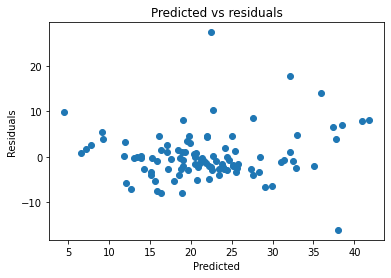

In [18]:
plt.scatter(pred_linreg,y_test-pred_linreg)

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs residuals")
plt.show()

2)KNN

In [19]:
def dis(v,w):
    return np.sqrt(np.sum((v-w)**2))
def knn_r(tr, tr_lab, te , k):
    distances = []
    
    for i in range(tr.shape[0]):
        distances.append(dis(tr[i], te))
    
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    distances = distances[inds]
    tr_lab_2 = tr_lab[inds]
    value = np.average(tr_lab_2[:k])
    
    return value

In [20]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [21]:
bos = pd.DataFrame(boston['data'])
bos.columns = boston['feature_names']
bos['Price'] = boston['target']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**9**) **List** **the** **websites**/**articles** **which** **you** **found** **helpful** **while** **doing** **your**
**search** **in** **your** **LinkedIn** **post**

* https://necromuralist.github.io/machine-learning-studies/posts/knn-regression/

* https://www.w3schools.com/python/python_ml_linear_regression.asp

* https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm
